In [3]:
import uproot
import awkward as ak
import json

import sys
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-e/eramosca/WCTE/2025_data/WCTE_BRB_Data_Analysis"))
sys.path.append('/eos/home-e/eramosca/WCTE/software/hipy')

import numpy as np
import pandas as pd
import hipy.pltext as pltext
import matplotlib.pyplot as plt

from wcte.brbtools import sort_run_files, get_part_files, select_good_parts, get_files_from_part
from wcte.brbtools import df_extend, filter_times_and_relocate_columns, df_mpmt_sumCharge
from wcte.mapping  import id_names
from tqdm          import tqdm

In [10]:
file_path = "/eos/experiment/wcte/data/2025_commissioning/offline_data/1380/WCTE_offline_R1380S0P11.root"
file = uproot.open(file_path)
print("Available TTres:", file.keys())
tree = file["WCTEReadoutWindows"]
print("Braches in WCTEReadoutWindows:", tree.keys())
#tree["event_number"].array()

Available TTres: ['WCTEReadoutWindows;1']
Braches in WCTEReadoutWindows: ['window_time', 'start_counter', 'run_id', 'sub_run_id', 'spill_counter', 'event_number', 'readout_number', 'trigger_types', 'trigger_times', 'led_gains', 'led_dacsettings', 'led_ids', 'led_card_ids', 'led_slot_numbers', 'led_event_types', 'led_types', 'led_sequence_numbers', 'led_counters', 'hit_mpmt_card_ids', 'hit_pmt_channel_ids', 'hit_mpmt_slot_ids', 'hit_pmt_position_ids', 'hit_pmt_charges', 'hit_pmt_times', 'pmt_waveform_mpmt_card_ids', 'pmt_waveform_pmt_channel_ids', 'pmt_waveform_mpmt_slot_ids', 'pmt_waveform_pmt_position_ids', 'pmt_waveform_times', 'pmt_waveforms', 'beamline_pmt_qdc_charges', 'beamline_pmt_tdc_times', 'beamline_pmt_qdc_ids', 'beamline_pmt_tdc_ids']


In [2]:
def create_df_from_file(files):
    """
    Input the information created with get_files_from_part.
    Creates a Pandas DataFrame with the event, card, channel, charge and time information.
    Returns the DataFrame.
    """
    cards        = files[0]
    channels     = files[1]
    charges      = files[2]
    hit_times    = files[3]
    window_times = files[4]

    nevents = len(cards)
    evts    = np.arange(nevents)
    nhits   = [len(cards[ievt]) for ievt in evts]
    evt_column = np.repeat(evts, nhits)
    window_column = np.repeat(window_times, nhits)

    xcards    = ak.flatten(cards)
    xchannels = ak.flatten(channels)
    xcharges  = ak.flatten(charges)
    xtimes    = ak.flatten(hit_times)
    df = pd.DataFrame({'evt':evt_column, 'window_time':window_column, 'card':xcards, 'channel':xchannels, 'charge':xcharges, "time":xtimes})
    return df

In [3]:
run        = 1728
map        = id_names
run_files  = sort_run_files(f"/eos/experiment/wcte/data/2025_commissioning/offline_data/{run}/WCTE_offline_R{run}S*P*.root")
part_files = get_part_files(run_files)
# good_parts = select_good_parts(part_files, run_files)

In [6]:
df_part0 = create_df_from_file(get_files_from_part(part_files[0], run_files))
df_part0

,evt,window_time,card,channel,charge,time
0,0,1.148101e+07,18,1,194.0,75565.862671
1,0,1.148101e+07,21,9,180.0,189408.903442
2,0,1.148101e+07,21,14,91.0,194291.167358
3,0,1.148101e+07,21,4,70.0,324460.148071
4,0,1.148101e+07,21,2,155.0,347215.048706
...,...,...,...,...,...,...
10743817,11112,1.853024e+10,130,9,936.0,295240.943115
10743818,11112,1.853024e+10,130,7,263.0,343248.774048
10743819,11112,1.853024e+10,130,17,65.0,394083.351929
10743820,11112,1.853024e+10,130,6,159.0,442267.477539


In [13]:
df_part1 = create_df_from_file(get_files_from_part(part_files[1], run_files))
events_offseted = df_part1.evt.values + (np.max(df_part0.evt) + 1)
df_part1["evt"] = events_offseted
df_part1

,evt,window_time,card,channel,charge,time
0,11113,1.853191e+10,109,5,230.0,30680.402954
1,11113,1.853191e+10,109,16,97.0,283951.635254
2,11113,1.853191e+10,18,5,121.0,78904.952393
3,11113,1.853191e+10,34,18,231.0,266842.788940
4,11113,1.853191e+10,34,14,69.0,323022.688721
...,...,...,...,...,...,...
17704085,29107,4.851990e+10,130,3,510.0,359872.718506
17704086,29107,4.851990e+10,130,7,203.0,405899.148071
17704087,29107,4.851990e+10,130,3,71.0,414972.828613
17704088,29107,4.851990e+10,130,3,311.0,418272.718994


In [15]:
df_part2 = create_df_from_file(get_files_from_part(part_files[2], run_files))
events_offseted = df_part2.evt.values + (np.max(df_part1.evt) + 1)
df_part2["evt"] = events_offseted
df_part2

,evt,window_time,card,channel,charge,time
0,29108,4.852157e+10,75,18,218.0,1862.446655
1,29108,4.852157e+10,75,5,189.0,362674.360962
2,29108,4.852157e+10,18,1,163.0,1949.704712
3,29108,4.852157e+10,18,16,174.0,1951.009521
4,29108,4.852157e+10,18,9,80.0,71495.199219
...,...,...,...,...,...,...
17707634,47109,7.852123e+10,132,19,931.0,2397.950317
17707635,47109,7.852123e+10,130,19,868.0,2397.967896
17707636,47109,7.852123e+10,130,7,64.0,72868.621460
17707637,47109,7.852123e+10,130,9,329.0,80510.162720


In [8]:
df_part3 = create_df_from_file(get_files_from_part(good_parts[3], run_files))
events_offseted = df_part3.evt.values + (np.max(df_part2.evt) + 1)
df_part3["evt"] = events_offseted
df_part3

,evt,card,channel,charge,time
0,1170,115,2,172.0,9.801387e+09
1,1170,115,14,159.0,9.801387e+09
2,1170,115,0,131.0,9.801387e+09
3,1170,115,1,326.0,9.801387e+09
4,1170,115,3,211.0,9.801387e+09
...,...,...,...,...,...
42981597,1616,46,5,107.0,5.441472e+09
42981598,1616,46,0,107.0,5.441966e+09
42981599,1616,46,9,107.0,5.442296e+09
42981600,1616,46,16,62.0,5.442368e+09


In [9]:
cards = np.unique(df_part0["card"])

In [10]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('./figures/hit_time_rollover.pdf') as pdf:
    for card in tqdm(cards, total=len(cards)):

        # # Part 0
        # events_part0 = df_part0[(df_part0["card"].values == card)]["evt"].values
        # times_part0  = df_part0[(df_part0["card"].values == card)]["time"].values

        # Part 1
        events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
        times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values

        # plt.scatter(events_part0, times_part0/1e9, marker="_");
        plt.scatter(events_part1, times_part1/1e9, marker=".", s=100, label=f"Card {card}");
        plt.xlim(508, 514);
        plt.xlabel("Event Number");
        plt.ylabel("Hit Time [s]");
        plt.legend(loc="upper right")

        pdf.savefig()
        plt.close()

100%|██████████| 83/83 [00:15<00:00,  5.26it/s]


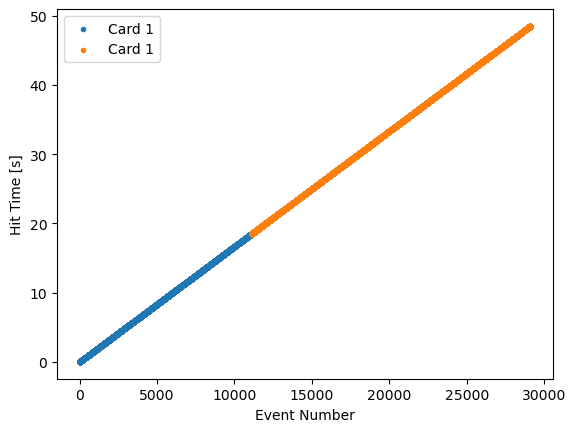

In [62]:
card = 1

# Part 0
events_part0 = df_part0[(df_part0["card"].values == card)]["evt"].values
times_part0  = df_part0[(df_part0["card"].values == card)]["time"].values + df_part0[(df_part0["card"].values == card)]["window_time"].values

# Part 1
events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values + df_part1[(df_part1["card"].values == card)]["window_time"].values

plt.scatter(events_part0, times_part0/1e9, marker=".", label=f"Card {card}");
plt.scatter(events_part1, times_part1/1e9, marker=".", label=f"Card {card}");
# plt.xlim(-1, 50);
# plt.ylim(0, 1e8);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper left");

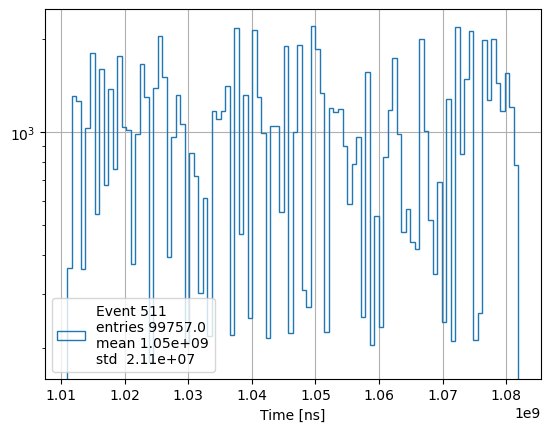

In [56]:
part1_times_event_511 = df_part1[(df_part1["evt"].values == 511)]["time"].values
part1_times_event_527 = df_part1[(df_part1["evt"].values == 527)]["time"].values

pltext.hist(part1_times_event_527, 100, xylabels=("Time [ns]"), ylog=True, formate=".2e", label="Event 511");
# plt.text(0.5e10, 3.7e4, f"Min Time:  {np.min(part1_times_event_527):.2e} ns");
# plt.text(0.5e10, 3e4, f"Max Time: {np.max(part1_times_event_527):.2e} ns");

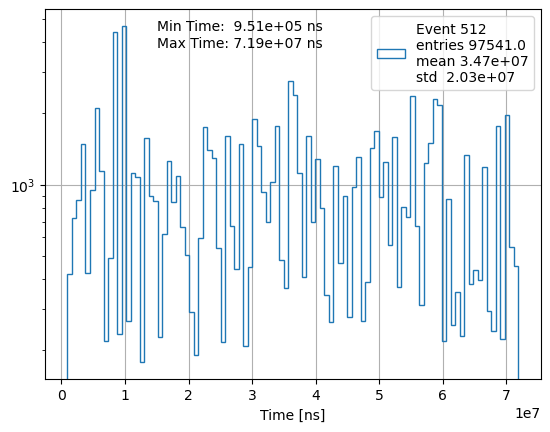

In [13]:
pltext.hist(part1_times_event_512, 100, xylabels=("Time [ns]"), ylog=True, label="Event 512", formate=".2e");
plt.text(1.5e7, 4500, f"Min Time:  {np.min(part1_times_event_512):.2e} ns");
plt.text(1.5e7, 3800, f"Max Time: {np.max(part1_times_event_512):.2e} ns");

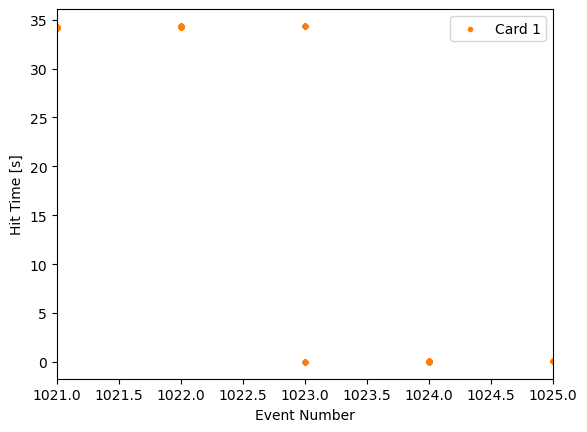

In [14]:
card = 1

# Part 1
events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values

# Part 2
events_part2 = df_part2[(df_part2["card"].values == card)]["evt"].values
times_part2  = df_part2[(df_part2["card"].values == card)]["time"].values

plt.scatter(events_part1, times_part1/1e9, marker="_");
plt.scatter(events_part2, times_part2/1e9, marker=".", label=f"Card {card}");
plt.xlim(1021, 1025);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper right");

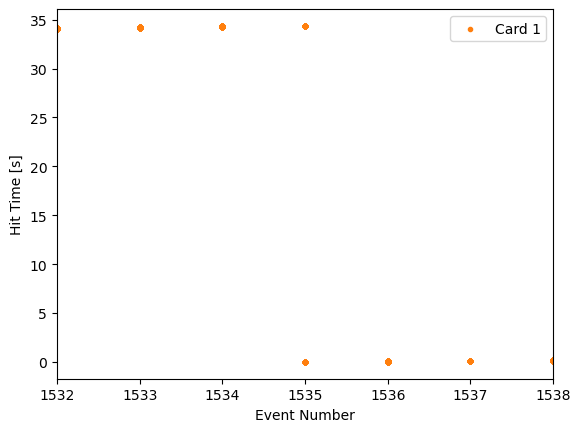

In [15]:
card = 1

# Part 2
events_part2 = df_part2[(df_part2["card"].values == card)]["evt"].values
times_part2  = df_part2[(df_part2["card"].values == card)]["time"].values

# Part 3
events_part3 = df_part3[(df_part3["card"].values == card)]["evt"].values
times_part3  = df_part3[(df_part3["card"].values == card)]["time"].values

plt.scatter(events_part2, times_part2/1e9, marker="_");
plt.scatter(events_part3, times_part3/1e9, marker=".", label=f"Card {card}");
plt.xlim(1532, 1538);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper right");

In [38]:
close_to_zero = part1_times_event_511[(part1_times_event_511 <= 2**30)]
close_to_good = part1_times_event_511[(part1_times_event_511 > 2**30)]

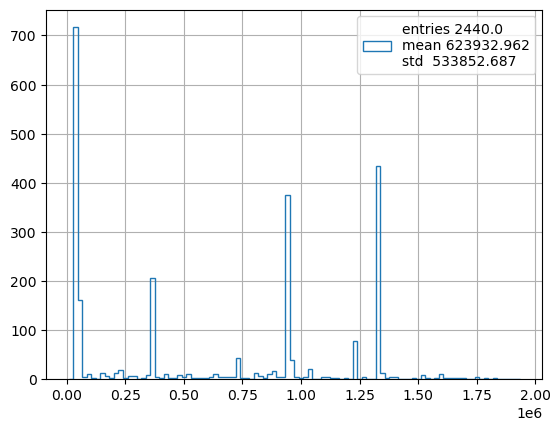

In [37]:
pltext.hist(close_to_zero, 100);

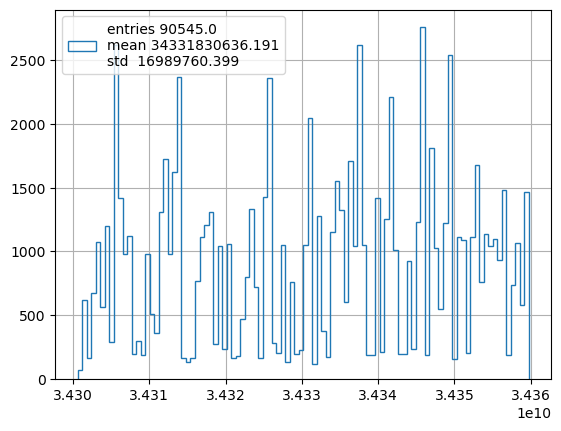

In [39]:
pltext.hist(close_to_good, 100);

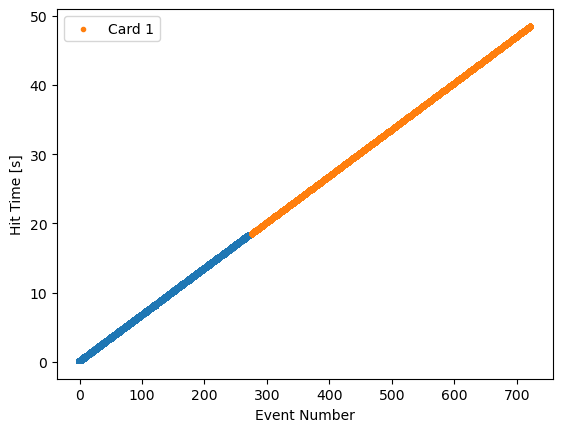

In [76]:
card = 1

# # Part 0
events_part0 = df_part0[(df_part0["card"].values == card)]["evt"].values
times_part0  = df_part0[(df_part0["card"].values == card)]["time"].values

# Part 1
events_part1 = df_part1[(df_part1["card"].values == card)]["evt"].values
times_part1  = df_part1[(df_part1["card"].values == card)]["time"].values

plt.scatter(events_part0, times_part0/1e9, marker="_");
plt.scatter(events_part1, corrected_times_part1/1e9, marker=".", label=f"Card {card}");
# plt.xlim(524, 530);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [s]");
plt.legend(loc="upper left");

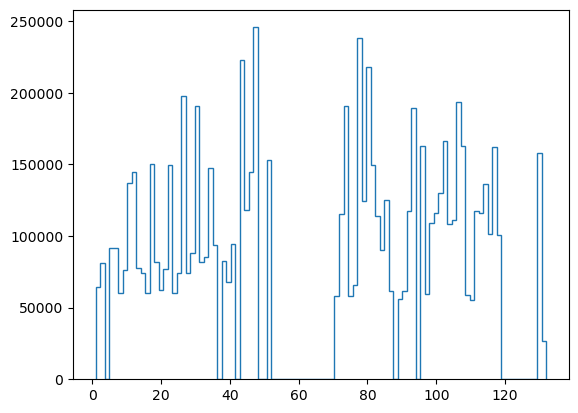

In [11]:
plt.hist(df_part0["card"].values, 100, histtype="step");

In [23]:
event0_times = df_part1[(~df_part1["card"].isin([130,131,132])) & (df_part1["evt"].values == 11113)]["time"] + df_part1[(~df_part1["card"].isin([130,131,132])) & (df_part1["evt"].values == 11113)]["window_time"]

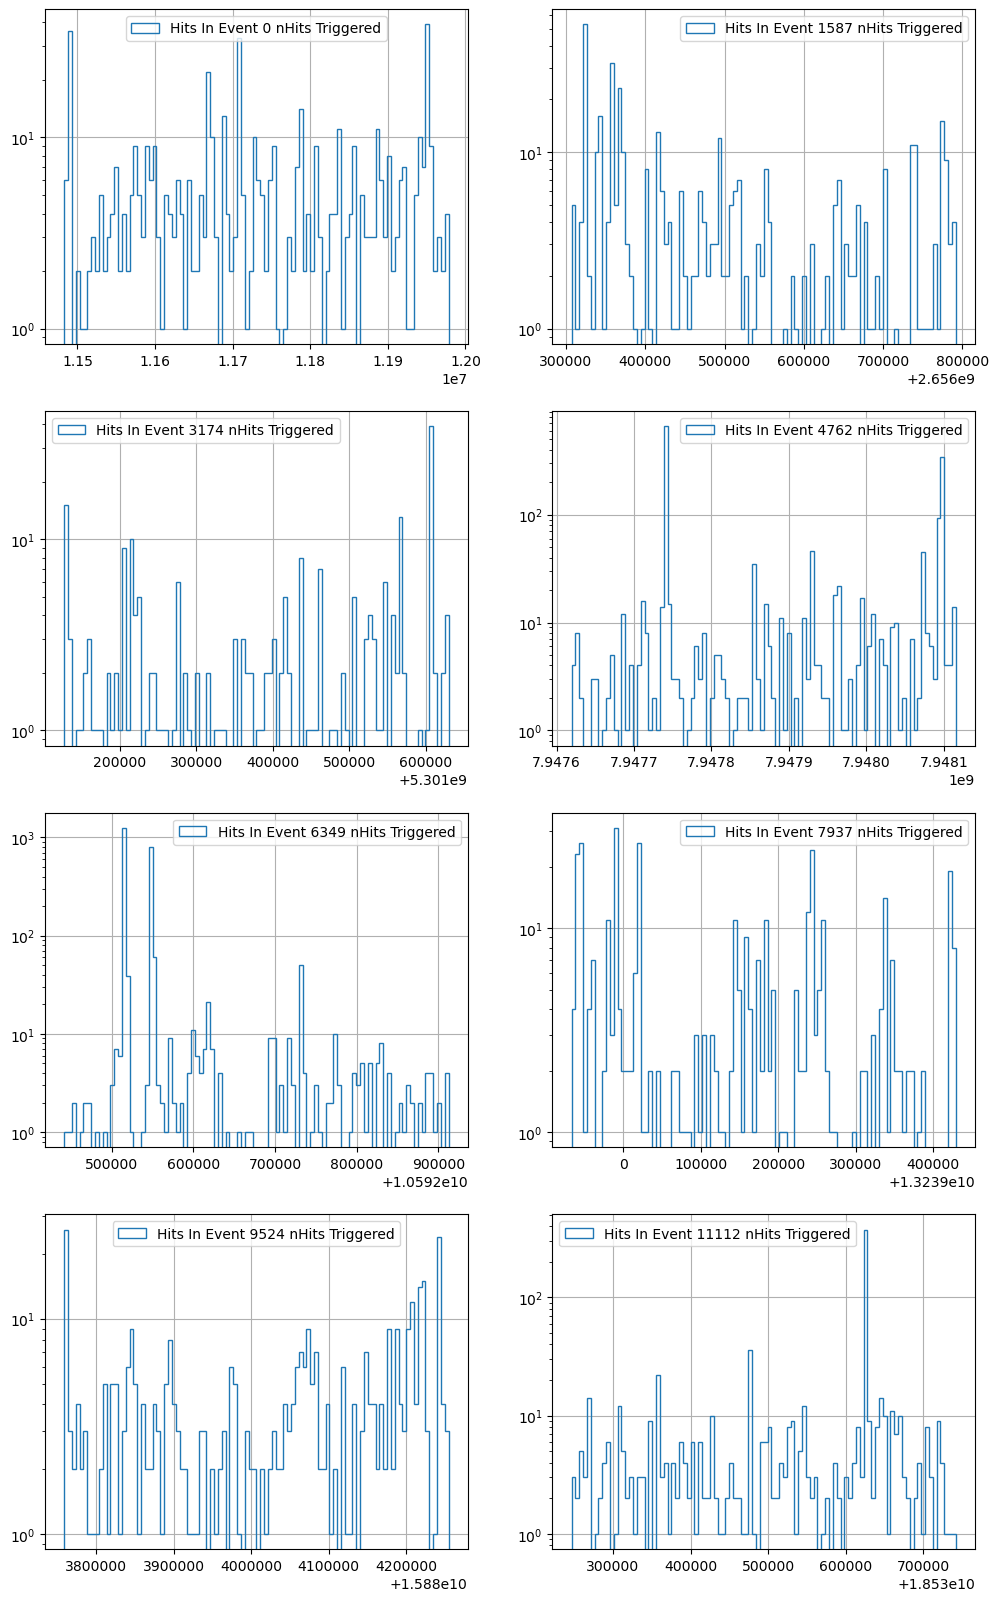

In [11]:
valid_events = np.linspace(df_part0.evt.min(), df_part0.evt.max(), 8).astype(np.int32)

subplot = pltext.canvas(8)

for i, event in enumerate(valid_events):
    subplot(i+1)
    pltext.hist(df_part0[(~df_part0["card"].isin([130,131,132])) & (df_part0["evt"].values == event)]["time"] + df_part0[(~df_part0["card"].isin([130,131,132])) & (df_part0["evt"].values == event)]["window_time"], 
                100, ylog=True, stats=False, label=f"Hits In Event {event} nHits Triggered", formate=".2e");

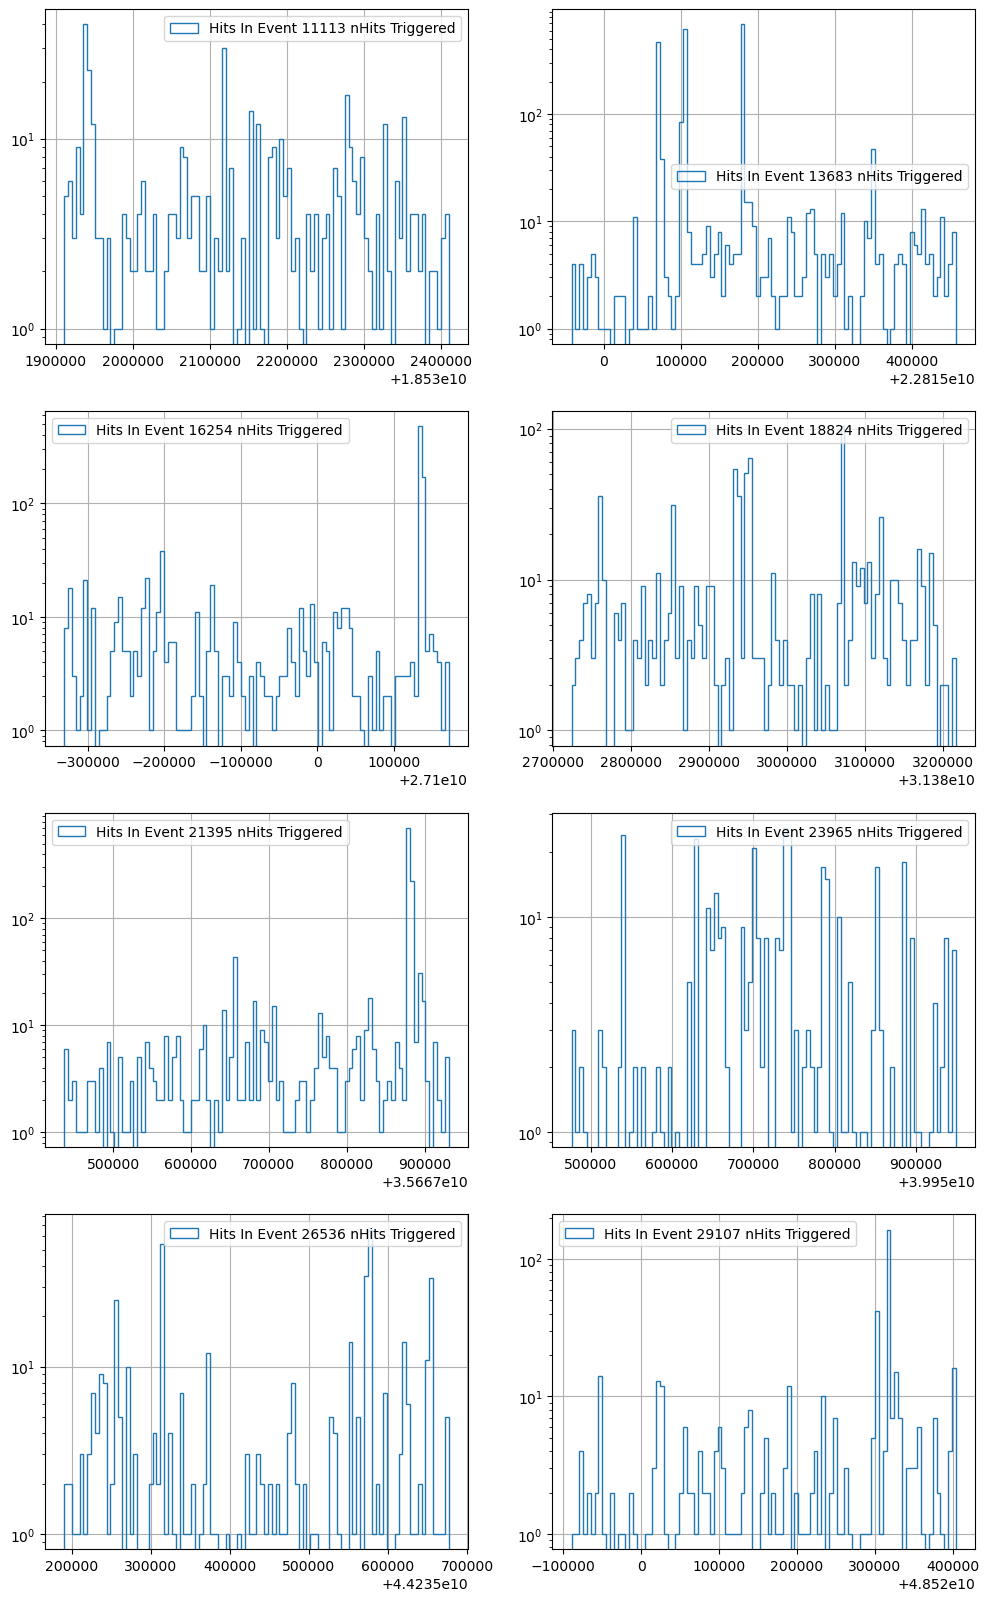

In [14]:
valid_events = np.linspace(df_part1.evt.min(), df_part1.evt.max(), 8).astype(np.int32)

subplot = pltext.canvas(8)

for i, event in enumerate(valid_events):
    subplot(i+1)
    pltext.hist(df_part1[(~df_part1["card"].isin([130,131,132])) & (df_part1["evt"].values == event)]["time"] + df_part1[(~df_part1["card"].isin([130,131,132])) & (df_part1["evt"].values == event)]["window_time"], 
                100, ylog=True, stats=False, label=f"Hits In Event {event} nHits Triggered", formate=".2e");

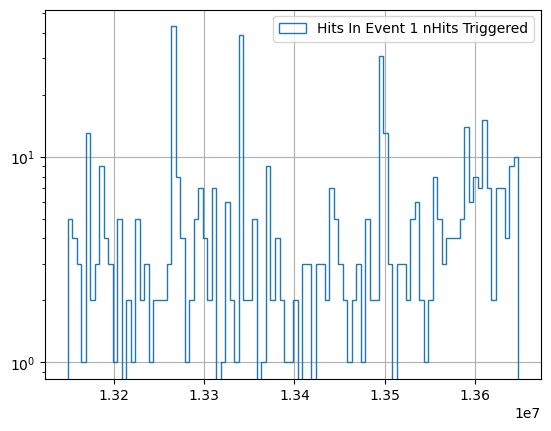

In [17]:
event = 1
pltext.hist(df_part0[(~df_part0["card"].isin([130,131,132])) & (df_part0["evt"].values == event)]["time"] + df_part0[(~df_part0["card"].isin([130,131,132])) & (df_part0["evt"].values == event)]["window_time"], 
                100, ylog=True, stats=False, label=f"Hits In Event {event} nHits Triggered", formate=".2e");